# Importing libs

In [5]:
import os
from dataclasses import dataclass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [6]:
@dataclass
class ConfusionMatrix:
  conf_matrix: np.array
  accuracy: float


def confusion_matrix(test_data, actual_values, model):
  pred_values = model.predict(test_data)
  bins = np.array([0, 0.5, 1.0])
  cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
  accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
  return ConfusionMatrix(cm, accuracy)

# Reading data

In [7]:
data = pd.read_csv(os.path.join('data', 'bank_data.csv'))
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [9]:
data.sample(5)

,interest_rate,credit,march,may,previous,duration,y
313,0.879,0.0,0.0,3.0,1.0,249.0,1
420,0.879,0.0,0.0,1.0,1.0,530.0,1
477,1.313,0.0,1.0,1.0,0.0,395.0,0
89,4.958,0.0,0.0,0.0,0.0,96.0,0
441,4.966,0.0,0.0,0.0,0.0,151.0,0


# Exploring data

In [10]:
data.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


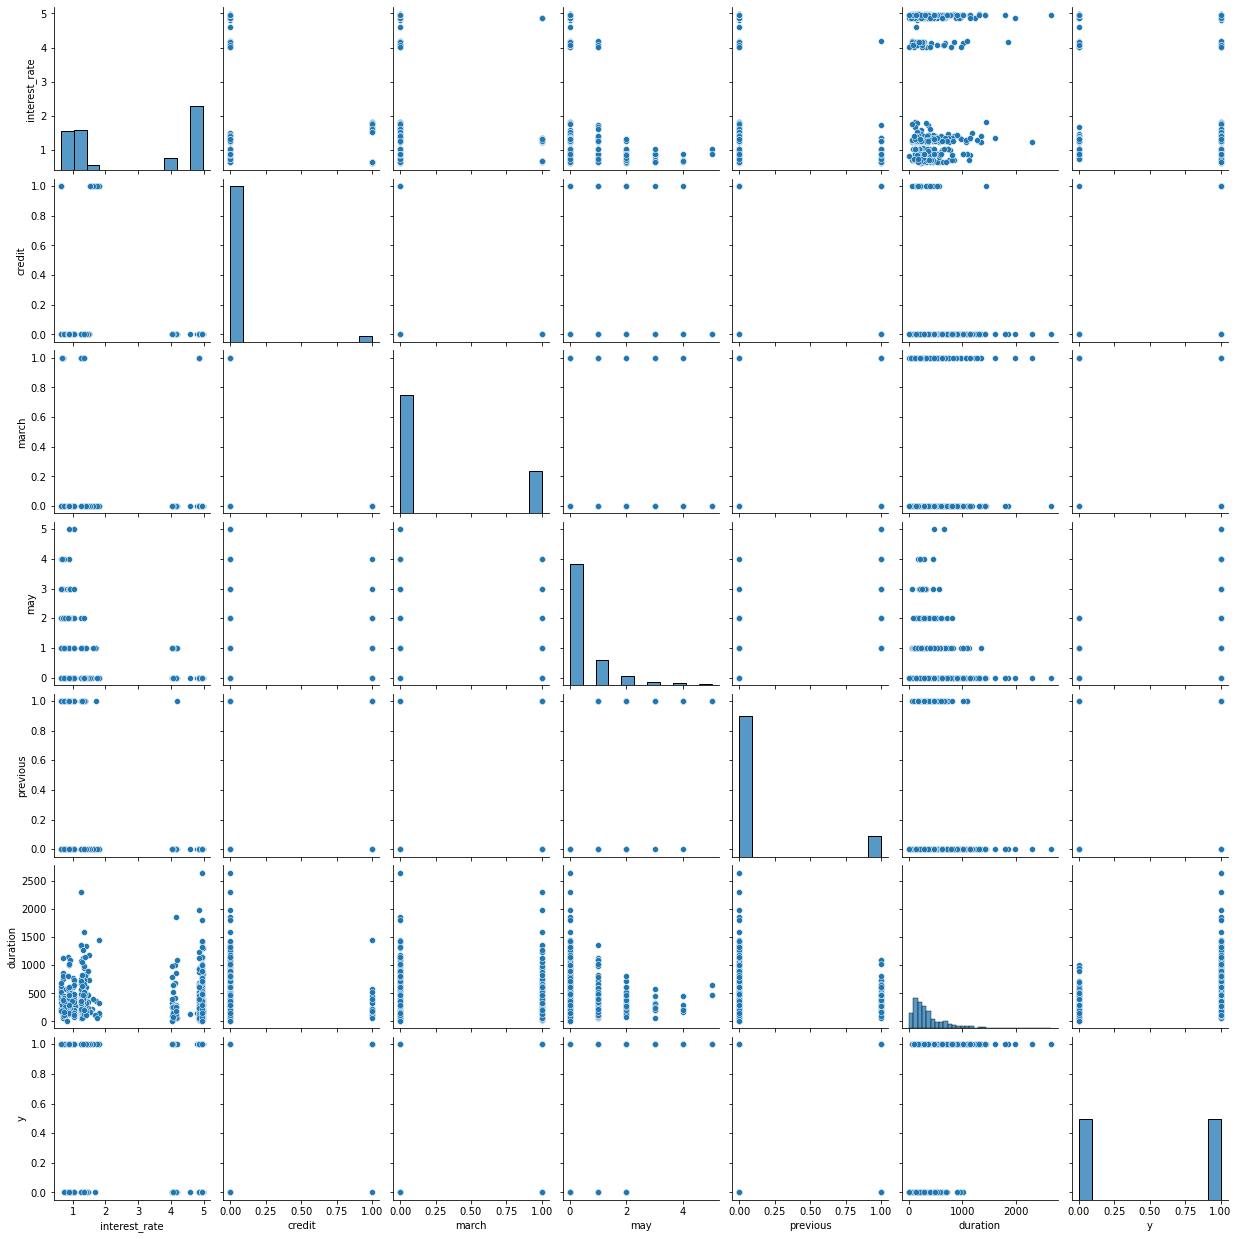

In [11]:
sns.pairplot(data)

# Logistic regression with one feature (duration)

Optimization terminated successfully.
         Current function value: 0.556128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.1966
Time:                        11:31:38   Log-Likelihood:                -230.24
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 2.550e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6855      0.209     -8.045      0.000      -2.096      -1.275
duration       0.0047      0.

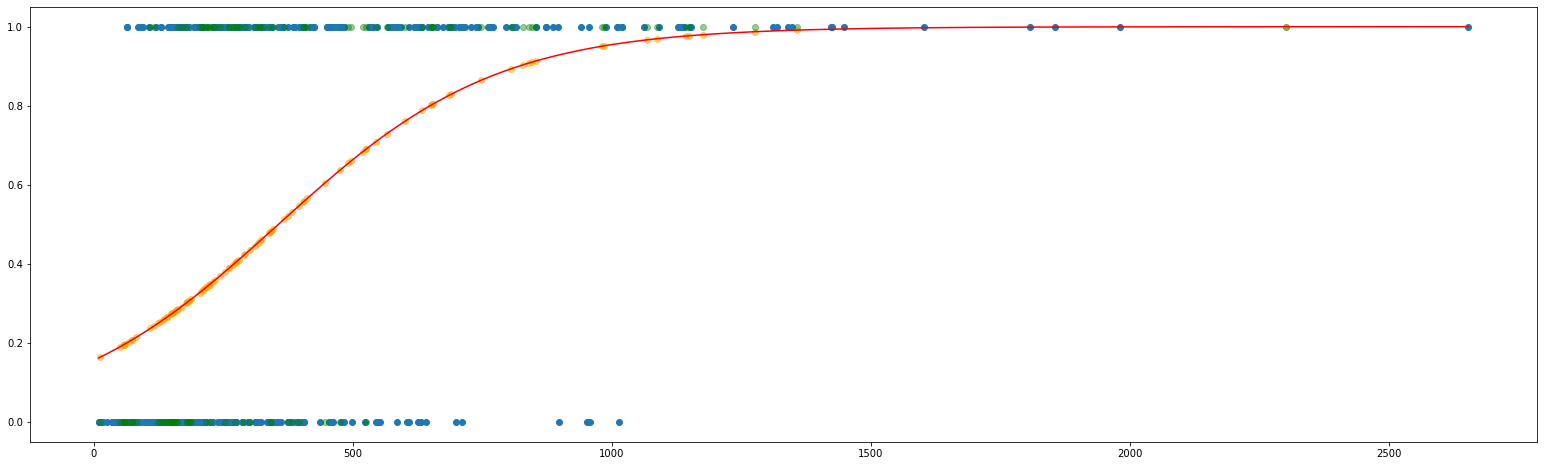

In [12]:
X1 = data[['duration']]#.drop('y', axis=1)
X = sm.add_constant(X1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)

print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

x_values = np.linspace(X.min(), X.max(), 1000)
plt.figure(figsize=(27, 8))
plt.scatter(X_train['duration'], y_train)
plt.scatter(X_test['duration'], results_log.predict(X_test), color='orange', alpha=0.5)
plt.scatter(X_test['duration'], y_test, color='green', alpha=0.4)
plt.plot(x_values[:,1], results_log.predict(x_values), color='r')

# Logistic Regression with one scaled feature (duration)

Optimization terminated successfully.
         Current function value: 0.556128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.1966
Time:                        11:31:38   Log-Likelihood:                -230.24
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 2.550e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1244      0.123      1.015      0.310      -0.116       0.365
duration       1.6289      0.

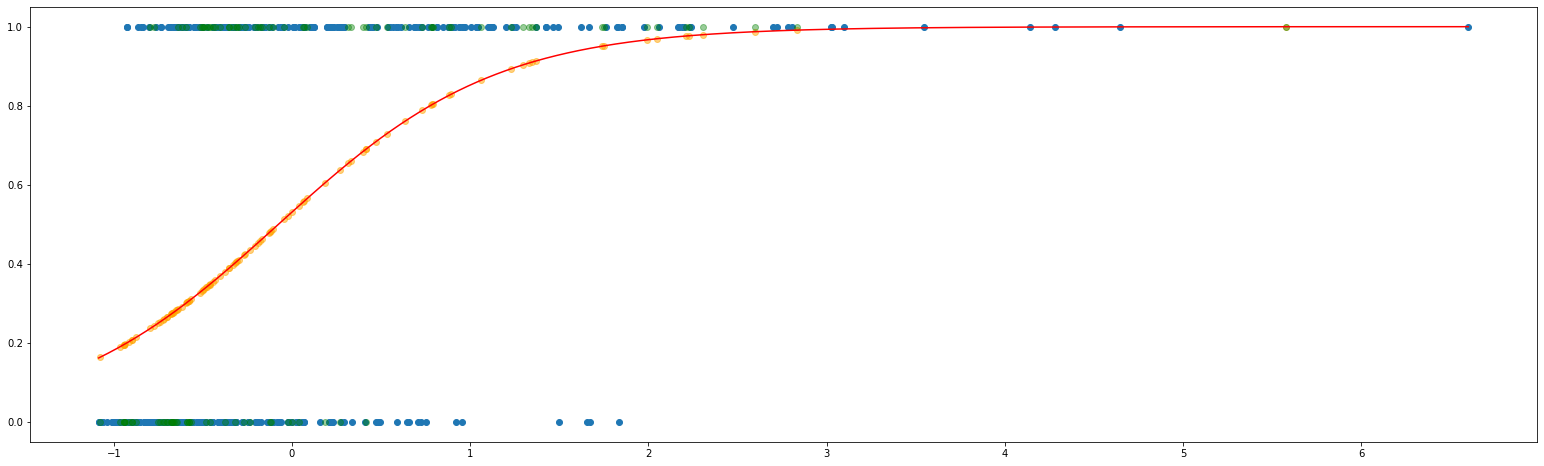

In [13]:
data_scaled = data.copy()

scaler = StandardScaler()
data_scaled['duration'] = scaler.fit_transform(data_scaled[['duration']])

X1 = data_scaled[['duration']]
X = sm.add_constant(X1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)

print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

x_values = np.linspace(X.min(), X.max(), 1000)
plt.figure(figsize=(27, 8))
plt.scatter(X_train['duration'], y_train)
plt.scatter(X_test['duration'], results_log.predict(X_test), color='orange', alpha=0.5)
plt.scatter(X_test['duration'], y_test, color='green', alpha=0.4)
plt.plot(x_values[:,1], results_log.predict(x_values), color='r')

# Logistic Regression one log-feature (duration)

Optimization terminated successfully.
         Current function value: 0.545406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.2121
Time:                        11:31:38   Log-Likelihood:                -225.80
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 2.901e-28
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.0754      1.013     -8.956      0.000     -11.061      -7.089
duration_log     1.6004

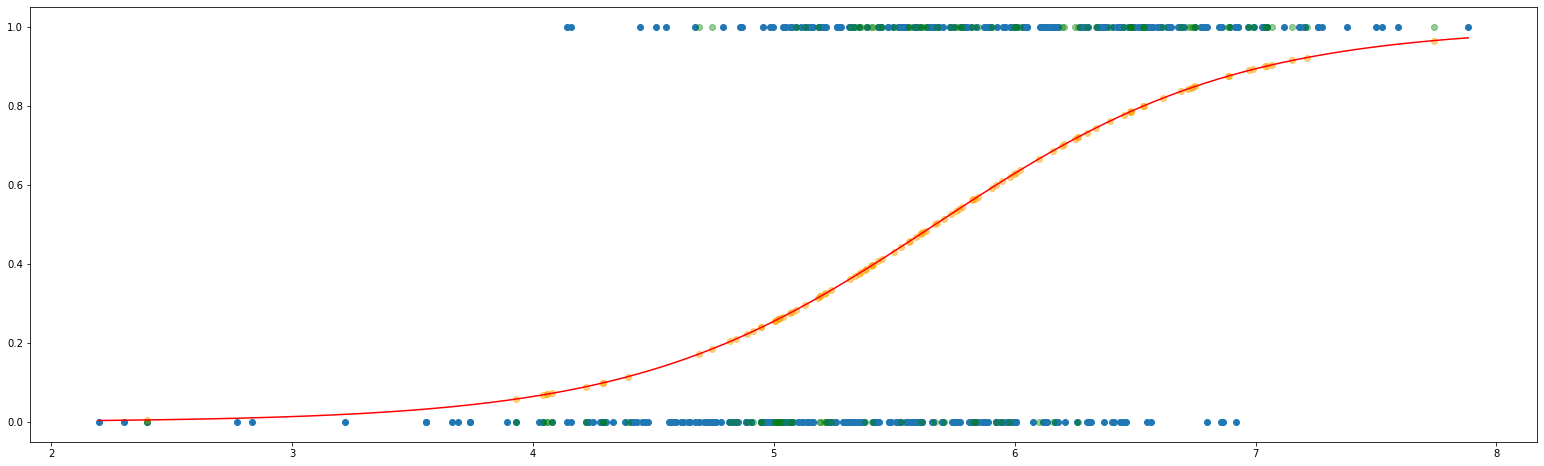

In [14]:
data2 = data.copy()
data2['duration_log'] = np.log(data2['duration'])

X1 = data2['duration_log']
X = sm.add_constant(X1)
y = data2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)
print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

x_values = np.linspace(X.min(), X.max(), 1000)
plt.figure(figsize=(27, 8))
plt.scatter(X_train['duration_log'], y_train)
plt.scatter(X_test['duration_log'], results_log.predict(X_test), color='orange', alpha=0.5)
plt.scatter(X_test['duration_log'], y_test, color='green', alpha=0.4)
plt.plot(x_values[:,1], results_log.predict(x_values), color='r')

# Logistic Regression one scaled log-feature (duration)

Optimization terminated successfully.
         Current function value: 0.545406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.2121
Time:                        11:31:38   Log-Likelihood:                -225.80
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 2.901e-28
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1225      0.115     -1.067      0.286      -0.347       0.103
duration_log     1.4077

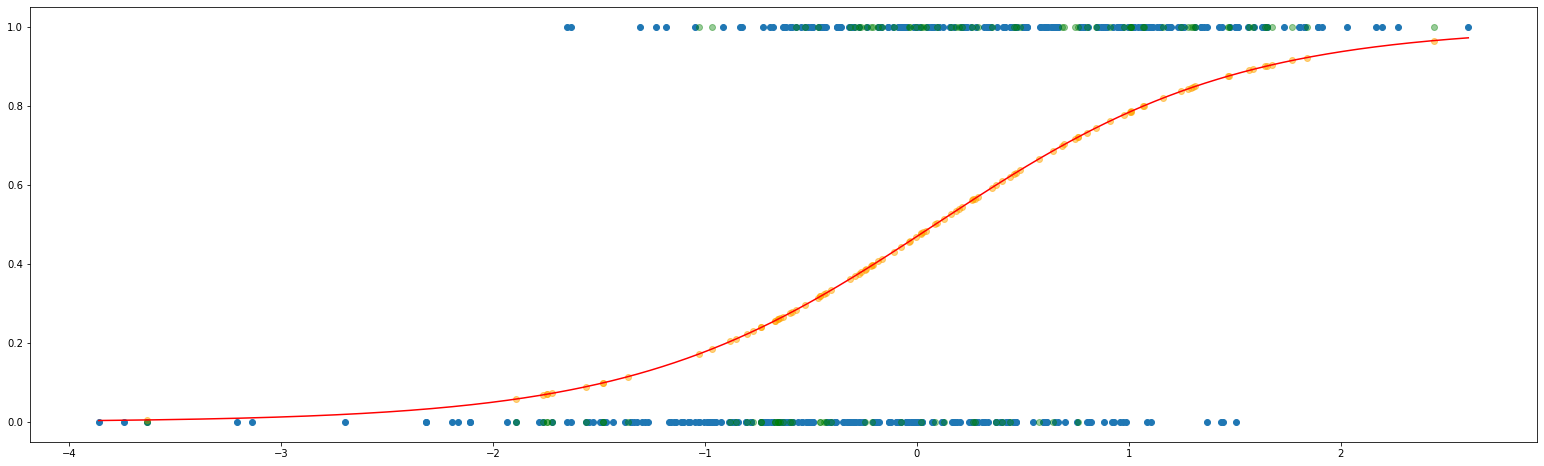

In [15]:
data3 = data.copy()
scaler = StandardScaler()
data3['duration_log'] = scaler.fit_transform(np.log(data3[['duration']]))

X1 = data3['duration_log']
X = sm.add_constant(X1)
y = data3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)
print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

x_values = np.linspace(X.min(), X.max(), 1000)
plt.figure(figsize=(27, 8))
plt.scatter(X_train['duration_log'], y_train)
plt.scatter(X_test['duration_log'], results_log.predict(X_test), color='orange', alpha=0.5)
plt.scatter(X_test['duration_log'], y_test, color='green', alpha=0.4)
plt.plot(x_values[:,1], results_log.predict(x_values), color='r')

# Logistic Regression with all features and log of duration feature

In [16]:
data3 = data.copy()
scaler = StandardScaler()
data3['duration_log'] = np.log(data3['duration'])

X1 = data3.drop(['duration', 'y'], axis=1)
X = sm.add_constant(X1)
y = data3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)
print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

Optimization terminated successfully.
         Current function value: 0.362491
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.4763
Time:                        11:31:39   Log-Likelihood:                -150.07
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 4.947e-56
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.2363      1.432     -7.849      0.000     -14.042      -8.430
interest_rate    -0.

# Logistic Regression with all features, except 'may', and log of duration feature

In [17]:
data3 = data.copy()
scaler = StandardScaler()
data3['duration_log'] = np.log(data3['duration'])

X1 = data3.drop(['duration', 'may', 'y'], axis=1)
X = sm.add_constant(X1)
y = data3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)
print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

Optimization terminated successfully.
         Current function value: 0.362875
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      408
Method:                           MLE   Df Model:                            5
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.4758
Time:                        11:31:39   Log-Likelihood:                -150.23
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 7.426e-57
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.0956      1.406     -7.890      0.000     -13.852      -8.339
interest_rate    -0.

# Logistic Regression using all features

Optimization terminated successfully.
         Current function value: 0.357584
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      407
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.4834
Time:                        11:31:39   Log-Likelihood:                -148.04
converged:                       True   LL-Null:                       -286.57
Covariance Type:            nonrobust   LLR p-value:                 6.679e-57
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0493      0.370     -0.133      0.894      -0.774       0.675
interest_rate    -0.

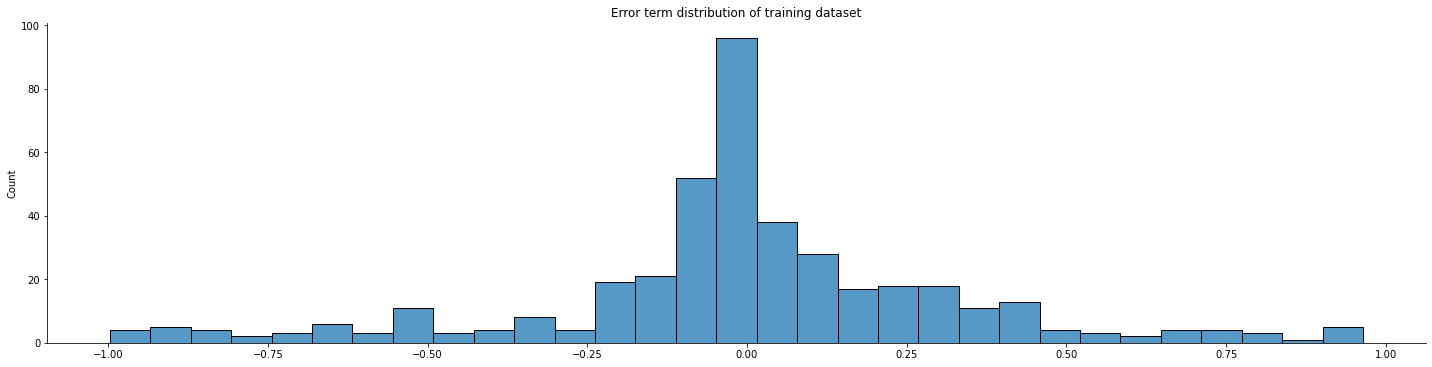

In [18]:
X1 = data.drop(['y'], axis=1)
X = sm.add_constant(X1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()

print(results_log.summary())

conf_matrix = confusion_matrix(X_test, y_test, results_log)

print(conf_matrix.conf_matrix)
print(conf_matrix.accuracy)

sns.displot(y_train - results_log.predict(X_train), aspect=4)
plt.title('Error term distribution of training dataset')
plt.show()